<a href="https://colab.research.google.com/github/Hira63S/Project-2-Water-Pump/blob/master/DS_project2_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install category_encoders

In [4]:
!pip install eli5

#eli5

In [0]:
%matplotlib inline
import sys
from matplotlib.pylab import rcParams

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [0]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [0]:
url1 = 'https://raw.githubusercontent.com/Hira63S/Project-2-Water-Pump/master/train_features.csv'
url2 = 'https://raw.githubusercontent.com/Hira63S/Project-2-Water-Pump/master/train_labels.csv'
url = 'https://raw.githubusercontent.com/Hira63S/Project-2-Water-Pump/master/test_features.csv'

In [0]:
X_train = pd.read_csv(url1)
#X_train.head(2)

In [0]:
X_test = pd.read_csv(url)
#X_test.head(2)

In [0]:
y_train = pd.read_csv(url2)
#y_train.head()

In [0]:
X_train.columns.tolist()

In [0]:
table = pd.Series(y_train.value_counts(normalize = True))

In [113]:
X_train.shape, X_test.shape

((59400, 47), (14358, 47))

In [0]:
years = X_train['age'].value_counts().head(15)

Text(0, 0.5, 'Number of Water Pumps')

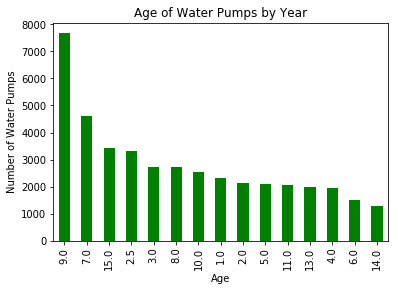

In [127]:
years.plot.bar(color='green')
plt.title('Age of Water Pumps by Year')
plt.xlabel('Age')
plt.ylabel('Number of Water Pumps')

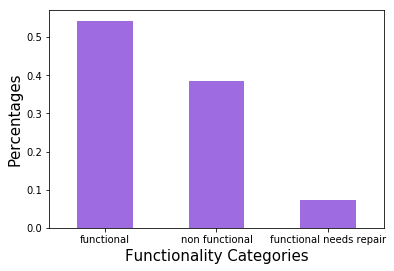

In [112]:
table.plot.bar(color = '#9E6BE1')
#plt.xticks(np.arange(10), ('All', '<$15K', '$15-20K', '$20-30K', '$40-50K', '$50K-70K', '$70K-100K', '100K-150K', '$150-200K', '$200+'), fontsize = 7)
#plt.yticks(fontsize = 9)
plt.ylabel('Percentages', fontsize=15)
plt.xlabel('Functionality Categories', fontsize = 15)
plt.tick_params(labelrotation=0)
#plt.text(x=-2, y=2, s='How Many Water Pumps are Functioning in Tanzania', fontsize=16)
#plt.text(x=-2, y=2, s='Sub-divided into 3 Categories', fontsize=14)
plt.show()

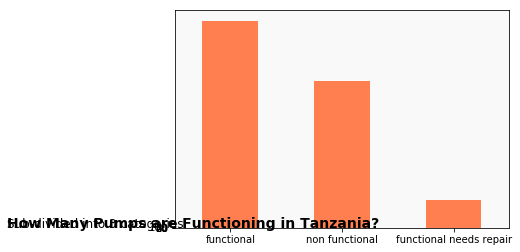

In [108]:
ax = y_train['status_group'].value_counts().plot(kind='bar', color = 'coral');
ax.set(yticks = range(0, 120, 20), facecolor = '#f9f9f9')
ax.text(x = -2, y =50, s='How Many Pumps are Functioning in Tanzania?', fontsize = 14, fontweight = 'bold');
ax.text(x=-2, y = 46, s = 'Sub-divided into 3 categories', fontsize = 12);
ax.tick_params(labelrotation=0)

In [97]:
plt.bar( )

TypeError: ignored

In [0]:
majority_class = y_train.mode()[0] #which one happened the most
y_pred = [majority_class] * len(y_train) 

#y_pred

###Only going to drop a few of them, the ones I think that would be most useful and then after an initial model, I might use all of them.

In [0]:
X_train = X_train.drop(columns = ['recorded_by', 'quantity_group', 'date_recorded', 'wpt_name', 'num_private', 'subvillage',
                       'region_code', 'management_group', 'extraction_type_group', 'extraction_type_class',
                       'scheme_name', 'payment', 'water_quality', 'source_type', 'source_class', 'waterpoint_type_group',
                       'ward', 'public_meeting', 'permit'])
    

In [0]:
X_test = X_test.drop(columns = ['recorded_by', 'quantity_group', 'date_recorded', 'wpt_name', 'num_private', 'subvillage',
                       'region_code', 'management_group', 'extraction_type_group', 'extraction_type_class',
                       'scheme_name', 'payment', 'water_quality', 'source_type', 'source_class', 'waterpoint_type_group',
                       'ward', 'public_meeting', 'permit'])
    

In [0]:
X_train.shape, X_test.shape

((59400, 21), (14358, 21))

#Feature Cleaning## no need to open
-##Date, scheme_name, management, 
- some feature engineering
- mostly improving the previous features

In [0]:
X_train['date_recorded_months'].head()

In [0]:
X_test['date_recorded_months'] = [(pd.to_datetime(date) - pd.to_datetime('2000-01-01')).
                                    days/30 for date in X_test['date_recorded']]
#X_test['date_recorded_months'].head(2)

In [0]:
X_train['scheme_name>75'] = X_train['scheme_name']

X_train = X_train.apply(lambda x: x.mask(x.map(x.value_counts())<75, 'NaN')
                        if x.name=='scheme_name>75' else x)

In [0]:
X_test['scheme_name>75'] = X_test['scheme_name']

X_test = X_test.apply(lambda x: x.mask(x.map(x.value_counts())<75, 'NaN')
                        if x.name=='scheme_name>75' else x)

In [0]:
X_test['scheme_name>75'].value_counts()

Then, we have a lot of 0's, so I change 0s with NaNs

###funder, installer, subvillage

In [0]:
X_train['funder > 300'] = X_train['funder']

X_train = X_train.apply(lambda x: x.mask(x.map(x.value_counts())<300, 'Other')
                        if x.name=='funder > 300' else x)

In [0]:
X_test['funder > 300'] = X_test['funder']

X_test = X_test.apply(lambda x: x.mask(x.map(x.value_counts())<300, 'Other')
                        if x.name=='funder > 300' else x)

In [17]:
X_train['funder'].describe()

count                      55765
unique                      1897
top       Government Of Tanzania
freq                        9084
Name: funder, dtype: object

In [0]:
X_train['funder > 300'].value_counts()

In [0]:
X_train['installer > 225'] = X_train['installer']

X_train = X_train.apply(lambda x: x.mask(x.map(x.value_counts())<225, 'Other')
                        if x.name=='installer > 225' else x)

In [0]:
X_test['installer > 225'] = X_test['installer']

X_test = X_test.apply(lambda x: x.mask(x.map(x.value_counts())<225, 'Other')
                        if x.name=='installer > 225' else x)

###not using subvillage as Iam using lga for location

In [0]:
X_train['subvillage > 80'] = X_train['subvillage']

X_train = X_train.apply(lambda x: x.mask(x.map(x.value_counts())<80, 'Other')
                        if x.name=='subvillage > 80' else x)

In [0]:
X_test['subvillage > 80'] = X_test['subvillage']

X_test = X_test.apply(lambda x: x.mask(x.map(x.value_counts())<80, 'NaN')
                        if x.name=='subvillage > 80' else x)

###Instead of mapping or replacing with NaNs, let's try filling in ###
- this might skew the overall results by a lot

###Scheme_management

In [0]:
X_train['scheme_management_missing'] = X_train['scheme_management'].isna()

In [0]:
X_test['scheme_management_missing'] = X_test['scheme_management'].isna()

In [0]:
X_train['scheme_management'] = X_train['scheme_management'].fillna(X_train['scheme_management'].mode()[0])


In [0]:
X_train['scheme_management'].value_counts()

VWC                 40670
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [0]:
X_test['scheme_management'] = X_test['scheme_management'].fillna(X_test['scheme_management'].mode()[0])


In [0]:
X_train['scheme_management'].value_counts()

VWC                 40670
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

###Construction_year

- also create an age feature?

In [0]:
X_train['no_const_year'] = (X_train['construction_year'] ==0)*1

X_test['no_const_year'] = (X_test['construction_year'] == 0)*1

let's try replacing nulls with mode because mean is 1300.


In [0]:
X_train['construction_year'].value_counts()

####instead of replacing with median which distorts results, I replaced with NaNs

In [0]:
X_train['construction_year'] = X_train['construction_year'].replace(0.0,np.nan)


In [0]:
X_test['construction_year'] = X_test['construction_year'].replace(0.0,np.nan)


In [0]:
X_train['construction_year'].fillna(X_train.groupby(['region_code'])['construction_year'].transform('median'), inplace=True)
X_train['construction_year'].fillna(X_train['construction_year'].median(), inplace=True)
    

In [0]:
X_test['construction_year'].fillna(X_test.groupby(['region_code'])['construction_year'].transform('median'), inplace=True)
X_test['construction_year'].fillna(X_test['construction_year'].median(), inplace=True)
    

In [0]:
X_test['construction_year'].isnull().sum()

0

###Create age feature

###wouldn't work because we don't know how old the wells are

In [0]:
# Convert date to datetime
X_train['date_recorded'] = pd.to_datetime(X_train['date_recorded'], infer_datetime_format=True)
    
    # Extract datetime data
X_train['year_recorded'] = X_train['date_recorded'].dt.year

In [0]:
X_train['year_recorded'].head()

0    2011
1    2013
2    2013
3    2013
4    2011
Name: year_recorded, dtype: int64

In [0]:
X_test['date_recorded'] = pd.to_datetime(X_test['date_recorded'], infer_datetime_format=True)
    
    # Extract datetime data
X_test['year_recorded'] = X_test['date_recorded'].dt.year

In [29]:
X_train['year_recorded'].value_counts()

2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: year_recorded, dtype: int64

In [0]:
X_train['year_recorded'].isnull().sum()

0

##Recorded - Construction year

In [0]:
X_train['age'] = X_train['year_recorded'] - X_train['construction_year']


In [0]:
X_test['age'] = X_train['year_recorded'] - X_test['construction_year']


In [32]:
X_test['age'].isnull().sum()

0

In [33]:
X_train.shape, X_test.shape

((59400, 46), (14358, 46))

#Some other importance features

- quantity
-amount_tsh
- waterpoint_type
- extraction_type
- construction_year
- management
- source
- population


amount_tsh also has a lot of values

In [0]:
X_train['amount_tsh'].value_counts()

In [0]:
X_train['amount_tsh'] = X_train['amount_tsh'].replace(0.0, np.nan)


In [0]:
X_test['amount_tsh'] = X_test['amount_tsh'].replace(0.0, np.nan)


In [0]:
X_train['amount_tsh'].describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [0]:
X_train['amount_tsh'].fillna(X_train.groupby(['region_code'])['amount_tsh'].transform('median'), inplace=True)

In [0]:
X_train['amount_tsh'].fillna(X_train['amount_tsh'].median(), inplace =True)

In [0]:
X_test['amount_tsh'].isnull().sum()

0

In [0]:
X_test['amount_tsh'].fillna(X_test.groupby(['region_code'])['amount_tsh'].transform('median'), inplace=True)

In [0]:
X_test['amount_tsh'].fillna(X_test['amount_tsh'].median(), inplace=True)

In [0]:
X_train['amount_tsh_miss'] = X_train['amount_tsh'].isna()
X_test['amount_tsh_miss'] = X_test['amount_tsh'].isna()

In [0]:
avg_amount = X_train[X_train['amount_tsh'] > 0]['amount_tsh'].mean()
X_train.loc[X_train['amount_tsh']==0, 'amount_tsh'] = int(avg_amount)


In [0]:
avg_amount = X_test[X_test['amount_tsh'] > 0]['amount_tsh'].mean()
X_test.loc[X_test['amount_tsh']==0, 'amount_tsh'] = int(avg_amount)


###water/ person

###Change population first.

In [0]:
X_train['population'] = X_train['population'].replace(0.0, np.nan)
X_test['population'] = X_test['population'].replace(0.0, np.nan)

In [0]:
X_train['population'].fillna(X_train.groupby(['region_code'])['population'].transform('median'), inplace=True)
X_train['population'].fillna(X_train['population'].median(), inplace=True)

In [0]:
X_test['population'].fillna(X_test.groupby(['region_code'])['population'].transform('median'), inplace=True)
X_test['population'].fillna(X_test['population'].median(), inplace=True)

In [0]:
X_test['population'].value_counts()

In [45]:
X_train['water/person'] = X_train['amount_tsh']/X_train['population']

X_train['water/person'].head()



0    55.045872
1     0.357143
2     0.100000
3     0.517241
4     0.171429
Name: water/person, dtype: float64

In [46]:
X_test['water/person'] = X_test['amount_tsh']/X_test['population']
X_test['water/person'].head()

0    0.155763
1    0.100000
2    0.100000
3    0.200000
4    8.333333
Name: water/person, dtype: float64

In [47]:
X_test['water/person'].isnull().sum()

0

In [48]:
X_train.shape, X_test.shape

((59400, 47), (14358, 47))

#Different model classification to choose the best one
##Now, feature selection

In [0]:
features = ['age', 'amount_tsh', 'quantity', 'water_quality',
           'basin', 'region_code', 'longitude', 'latitude', 'source', 'extraction_type']

target = 'status_group'

In [0]:
X_train_select = X_train[features]
X_test_select = X_test[features]
y_train = y_train[target]

In [0]:
encoder = ce.OrdinalEncoder()
X_train_select = encoder.fit_transform(X_train_select)

In [0]:
encoder = ce.OrdinalEncoder()
X_test_select = encoder.fit_transform(X_test_select)

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

models = [LogisticRegression(solver = 'lbfgs', max_iter = 1000),
          DecisionTreeClassifier(max_depth=3), 
          DecisionTreeClassifier(max_depth=None), 
          RandomForestClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42), 
          RandomForestClassifier(max_depth=None, n_estimators=100, n_jobs=-1, random_state=42), 
          XGBClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42)]

for model in models:
    print(model, '\n')
    score = cross_val_score(model, X_train_select, y_train, scoring='accuracy', cv=5).mean()
    print('Cross-Validation Accuracy:', score, '\n', '\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linea

Cross-Validation Accuracy: 0.6363972324445634 
 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') 

Cross-Validation Accuracy: 0.6873572483368087 
 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') 

Cross-Validation Accuracy: 0.7484174226532649 
 

RandomForestClassifier(bootstrap=True, 

##All_models feature importances 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


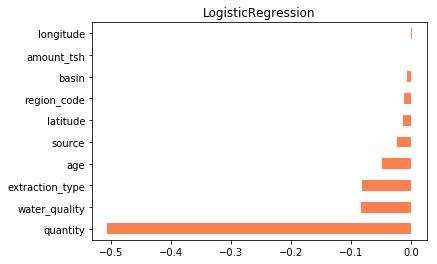

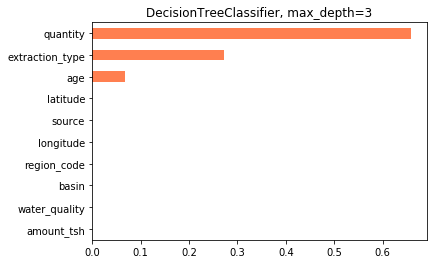

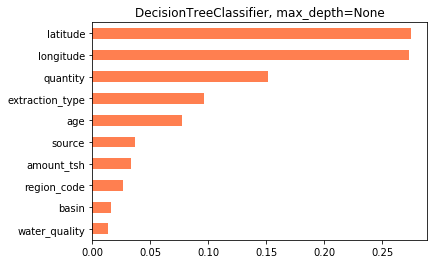

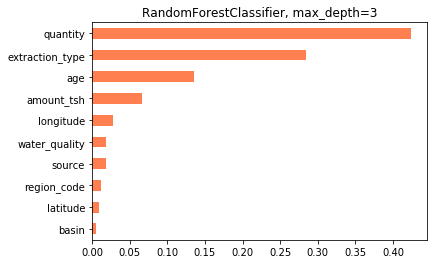

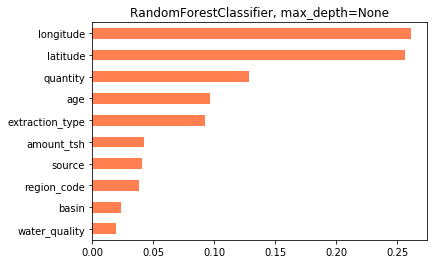

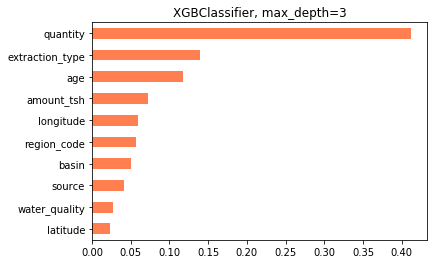

In [0]:
for model in models:
    name = model.__class__.__name__
    model.fit(X_train_select, y_train)
    if name == 'LogisticRegression':
        coefficients = pd.Series(model.coef_[0], X_train_select.columns)
        coefficients.sort_values().plot.barh(color='coral', title=name)
        plt.show()
    else:
        importances = pd.Series(model.feature_importances_, X_train_select.columns)
        title = f'{name}, max_depth={model.max_depth}'
        importances.sort_values().plot.barh(color='coral', title=title)
        plt.show()

#first random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
model = RandomForestClassifier(n_estimators=300,min_samples_leaf=3 ,n_jobs=-1,max_features=0.25)
#search = model.fit(X_train_select, y_train)
model.fit(X_train_select, y_train)
#score = cross_val_score(model, X_train_select, y_train, scoring='accuracy', cv=5).mean()
#print('CV score:', score)

#y_pred= m.predict(X_test_)
#accuracy_score(y_train, y_pred)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
X_train_select.shape, X_test_select.shape

((59400, 11), (14358, 11))

In [0]:
y_pred = model.predict(X_test_select)

In [0]:
submission = pd.DataFrame({'id': X_test['id'], 'status_group': list(y_pred)})

In [0]:
filename = 'RandomForestClassifier submission.csv'
submission.to_csv(filename,index=False)

print('saved file:' + filename)

saved file:RandomForestClassifier submission.csv


#Fewer Features

###With most weighted features

In [0]:
features = ['age', 'amount_tsh', 'source_type', 'population', 'management',
           'latitude', 'longitude', 'water_quality', 'gps_height','region_code']

we need source, region code, gps height, district code and management.

In [0]:
X_train['gps_height'] = X_train['gps_height'].replace(0.0, np.nan)
X_train['gps_height'].fillna(X_train.groupby(['region_code'])['gps_height'].transform('mean'), inplace=True)
X_train['gps_height'].fillna(X_train['gps_height'].mean(), inplace=True)

In [0]:
X_test['gps_height'] = X_test['gps_height'].replace(0.0, np.nan)
X_test['gps_height'].fillna(X_test.groupby(['region_code'])['gps_height'].transform('mean'), inplace=True)
X_test['gps_height'].fillna(X_test['gps_height'].mean(), inplace=True)

In [0]:
X_test['quantity'].value_counts()

enough          7997
insufficient    3679
dry             1518
seasonal         982
unknown          182
Name: quantity, dtype: int64

#With few features

In [0]:
features = ['water/person', 'population', 'amount_tsh', 'water_quality',
           'quantity', 'latitude', 'longitude',
           'age', 'gps_height']
target = 'status_group'

In [0]:
X_train['installer > 225'].isnull().sum()

3655

In [0]:
X_train_few = X_train[features]
X_test_few = X_test[features]
#y_train = y_train[target]

okay, construction_year, amount_tsh, funder >300, and installer > 225 have nans.

In [0]:
encoder = ce.OrdinalEncoder()
X_test_few = encoder.fit_transform(X_test_few)

X_train_few = encoder.fit_transform(X_train_few)

In [0]:
model = RandomForestClassifier(n_estimators=300,min_samples_leaf=3 ,n_jobs=-1,max_features=0.25)
model.fit(X_train_few, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
X_train_few.shape, X_test_few.shape

((59400, 9), (14358, 9))

In [0]:
y_pred = model.predict(X_test_few)

In [0]:
submission = pd.DataFrame({'id': X_test['id'], 'status_group': list(y_pred)})

filename = 'RandomForest_few submission.csv'
submission.to_csv(filename,index=False)

print('saved file:' + filename)

saved file:RandomForest_few submission.csv


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
param_distributions = {
    'n_estimators': [200,300], #estimators, what if we have 100 trees or 200 trees.
 #it measure the quality of split. uses mean squared error and 
    #mean absolute error
}

gridsearch = RandomizedSearchCV( #we initialize it like it is a model
  RandomForestClassifier(min_samples_leaf=3, max_features=0.25, random_state =42),
  param_distributions = param_distributions,
  n_iter=8, #a tradeoff between how long it takes to fix vs. no. of parameter that are chosen.
  cv=4,
  scoring ='accuracy',
  verbose=10, #it shows were it is at. so it shows us. 
  return_train_score=True,
  n_jobs=-1 #easy to do in parallel, it would quite as long if not having this.
    #n_iter gives candidates.
    #cv gives the folds. 

)

gridsearch.fit(X_train_few, y_train)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 2 is smaller than n_iter=8. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   55.9s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:  1.6min remaining:   32.4s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be ca

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=0.25,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=3,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None,


In [0]:
results = pd.DataFrame(gridsearch.cv_results_)
results.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
1,34.489339,0.653394,1.663696,0.129273,300,{'n_estimators': 300},0.772473,0.760943,0.764242,0.761735,0.764848,0.004568,1,0.879638,0.880875,0.881257,0.879599,0.880342,0.000737
0,22.981877,0.321498,1.042683,0.040620,200,{'n_estimators': 200},0.771800,0.761279,0.763636,0.762543,0.764815,0.004118,2,0.879548,0.881010,0.881100,0.879195,0.880213,0.000852


In [0]:
best = gridsearch.best_estimator_

In [0]:
y_pred = best.predict(X_test_few)

In [0]:
submission = pd.DataFrame({'id': X_test['id'], 'status_group': list(y_pred)})

filename = 'RandomForest_few2 submission.csv'
submission.to_csv(filename,index=False)

print('saved file:' + filename)

saved file:RandomForest_few2 submission.csv


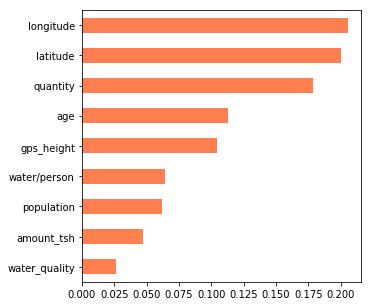

In [0]:
best.feature_importances_

figsize = (5,5)
importances = pd.Series(best.feature_importances_, X_train_few.columns)
top_n = importances.sort_values()
plt.figure(figsize = figsize)
top_n.plot.barh(color='coral');

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(best, scoring='accuracy', cv='prefit',
                     n_iter=2, random_state=42) 
#the first argument is you pass in the estimator

permuter.fit(X_train_few, y_train)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=0.25,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=3,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=300,
                                                       

In [0]:
feature_names = X_train_few.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names = feature_names)


Weight,Feature
0.2021 ± 0.0010,quantity
0.1381 ± 0.0013,longitude
0.1309 ± 0.0012,age
0.1220 ± 0.0001,latitude
0.0907 ± 0.0013,gps_height
0.0666 ± 0.0001,population
0.0522 ± 0.0006,amount_tsh
0.0475 ± 0.0016,water/person
0.0285 ± 0.0010,water_quality


In [0]:
X_test['funder > 300'].fillna('other', inplace=True)

In [53]:
X_test['funder > 300'].isnull().sum()

0

In [54]:
X_train['funder > 300'].fillna('other', inplace=True)
X_train['funder > 300'].isnull().sum()

0

###Water_quality really doesn't weight a lot so I will take that out.


In [0]:
features = ['water/person', 'population', 'amount_tsh',
           'quantity', 'latitude', 'longitude', 'funder > 300', 
           'age', 'gps_height']
target = 'status_group'

In [0]:
X_train_few = X_train[features]
X_test_few = X_test[features]
#y_train = y_train[target]

In [0]:
encoder = ce.OrdinalEncoder()
X_test_few = encoder.fit_transform(X_test_few)

X_train_few = encoder.fit_transform(X_train_few)

In [0]:
X_train_few.isnull().sum()

water/person    0
population      0
amount_tsh      0
quantity        0
latitude        0
longitude       0
funder > 300    0
age             0
gps_height      0
dtype: int64

In [68]:
param_distributions = {
    'n_estimators': (200,400), #estimators, what if we have 100 trees or 200 trees.
 #it measure the quality of split. uses mean squared error and 
    #mean absolute error
}

gridsearch = RandomizedSearchCV( #we initialize it like it is a model
  RandomForestClassifier(min_samples_leaf=3, max_features=0.25, random_state =42),
  param_distributions = param_distributions,
  n_iter=8, #a tradeoff between how long it takes to fix vs. no. of parameter that are chosen.
  cv=4,
  scoring ='accuracy',
  verbose=10, #it shows were it is at. so it shows us. 
  return_train_score=True,
  n_jobs=-1 #easy to do in parallel, it would quite as long if not having this.
    #n_iter gives candidates.
    #cv gives the folds. 

)

gridsearch.fit(X_train_few, y_train)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 2 is smaller than n_iter=8. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   54.1s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:  1.8min remaining:   35.5s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be ca

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=0.25,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=3,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None,


In [69]:
results = pd.DataFrame(gridsearch.cv_results_)
results.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
1,43.401548,0.574820,2.092265,0.167089,400,{'n_estimators': 400},0.776917,0.767744,0.770370,0.767190,0.770556,0.003865,1,0.882758,0.883771,0.884175,0.884425,0.883782,0.000636
0,22.293491,0.295878,0.976225,0.021120,200,{'n_estimators': 200},0.775571,0.767811,0.769495,0.767931,0.770202,0.003170,2,0.882556,0.883816,0.883996,0.883796,0.883541,0.000574


In [0]:
best = gridsearch.best_estimator_

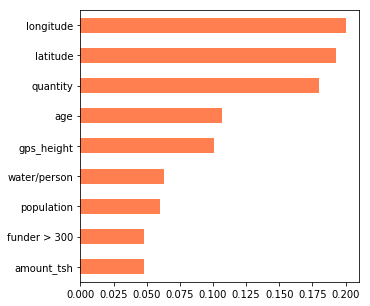

In [71]:
best.feature_importances_

figsize = (5,5)
importances = pd.Series(best.feature_importances_, X_train_few.columns)
top_n = importances.sort_values()
plt.figure(figsize = figsize)
top_n.plot.barh(color='coral');

In [72]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(best, scoring='accuracy', cv='prefit',
                     n_iter=2, random_state=42) 
#the first argument is you pass in the estimator

permuter.fit(X_train_few, y_train)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=0.25,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=3,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=400,
                                                       

In [73]:
feature_names = X_train_few.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names = feature_names)


Weight,Feature
0.2020 ± 0.0010,quantity
0.1287 ± 0.0005,longitude
0.1249 ± 0.0007,age
0.1143 ± 0.0009,latitude
0.0822 ± 0.0009,funder > 300
0.0781 ± 0.0003,gps_height
0.0569 ± 0.0003,population
0.0478 ± 0.0005,amount_tsh
0.0423 ± 0.0005,water/person


In [0]:
y_pred = best.predict(X_test_few)

In [0]:
y_pred

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

##Prepare the submission file

In [0]:
X_test = pd.read_csv(url)

In [0]:
y_pred = search.predict(X_test_select)

In [0]:
submission = pd.DataFrame({'id': X_test['id'], 'status_group': list(y_pred)})

In [0]:
filename = 'XGBoost3 submission.csv'
submission.to_csv(filename,index=False)

print('saved file:' + filename)

saved file:XGBoost3 submission.csv


#Visualizations

In [0]:
!pip install shap

     |████████████████████████████████| 235kB 2.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/93/3f/4a/331cf71b5043416aeba0df795e7c204c7ad277673f1938d11b
Successfully built shap


In [0]:
!pip install pdpbox

     |████████████████████████████████| 57.7MB 1.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


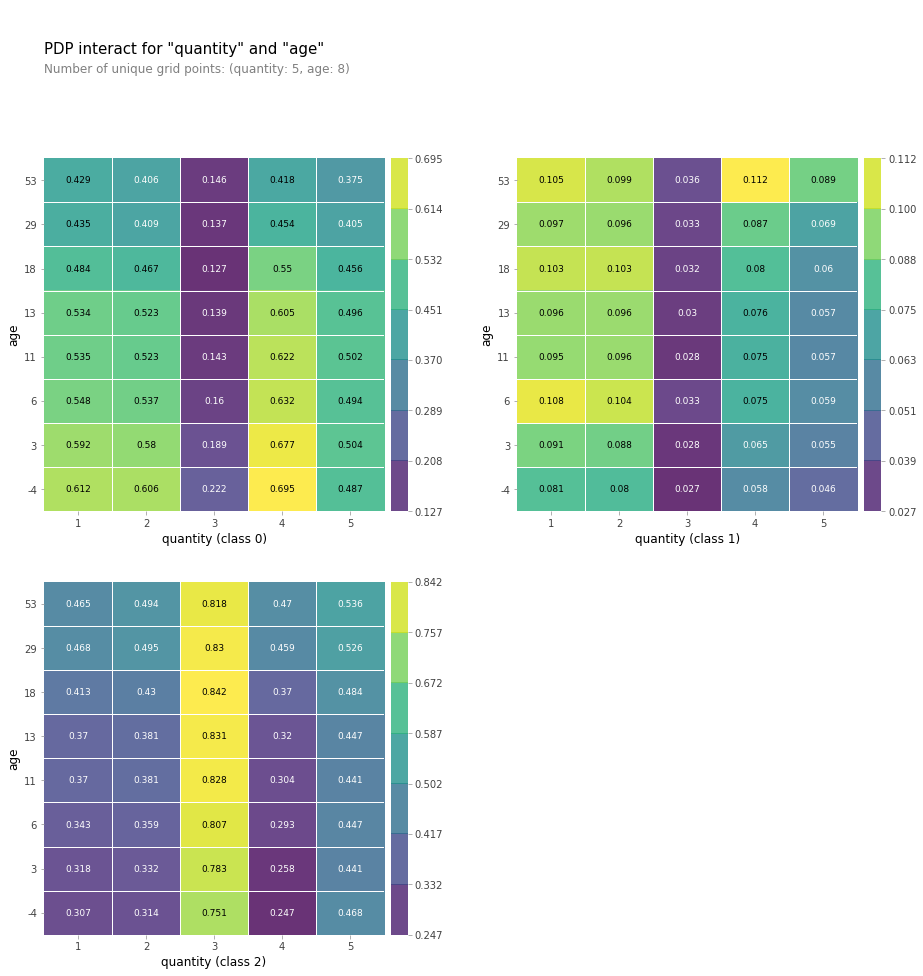

In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['quantity', 'age']

interaction = pdp_interact(
    model=best,
    dataset=X_test_few,
    model_features = X_test_few.columns,
    features = features
)

pdp_interact_plot(interaction, plot_type= 'grid', feature_names=features);


#Shapley values

In [0]:
y_pred = (y_pred_proba >= 0.5).astype(int)
confidence = np.abs(y_pred_proba - 0.5)
preds = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 
                      'y_pred_proba': y_pred_proba, 
                      'confidence': confidence})

preds.head(10)

In [0]:
df_total = pd.concat([X_train_few, y_train], axis=1)

#Heatmap

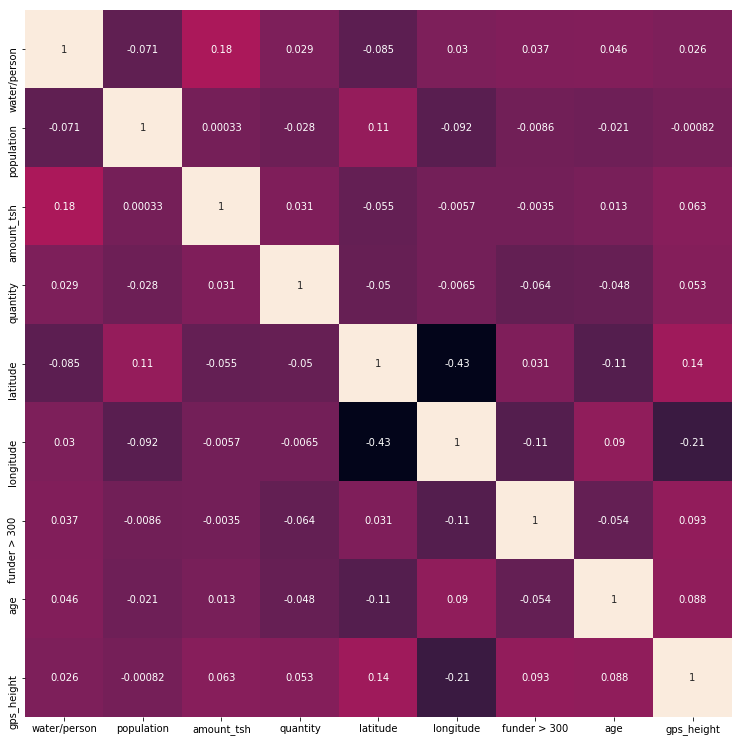

In [81]:
corr_table = df_total.corr()
plt.figure(figsize=(14,13))
sns.heatmap(corr_table, square=True, annot=True, cbar=False);

In [88]:
X_train_few.head()

,water/person,population,amount_tsh,quantity,latitude,longitude,funder > 300,age,gps_height
0,55.045872,109.0,6000.0,4,-9.856322,34.938093,1.0,12.0,1390.0
1,0.357143,280.0,100.0,2,-2.147466,34.698766,1.0,3.0,1399.0
2,0.100000,250.0,25.0,4,-3.821329,37.460664,1.0,4.0,686.0
3,0.517241,58.0,30.0,3,-11.155298,38.486161,-1.0,27.0,263.0
4,0.171429,175.0,30.0,1,-1.825359,31.130847,1.0,2.5,23.0


In [0]:
df_total.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


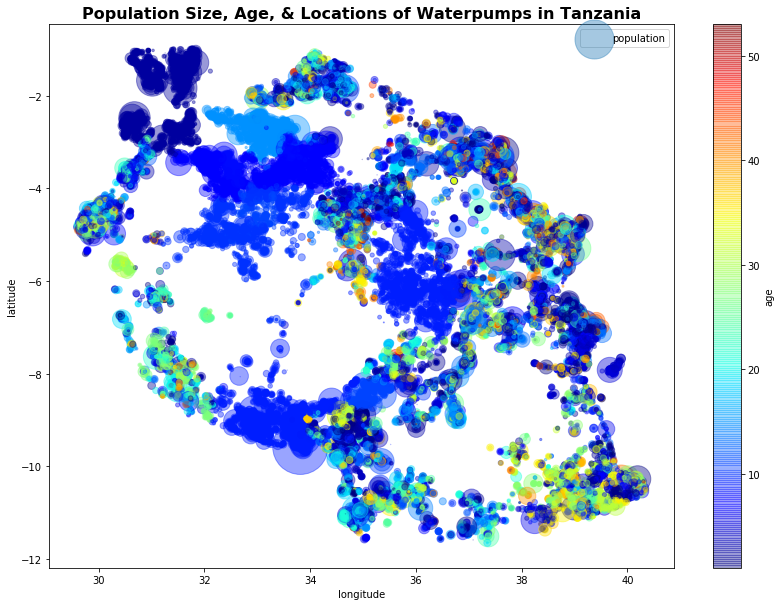

In [86]:
df_total[df_total['longitude']>0] [df_total['latitude']<0][X_train['construction_year']>0].plot\
(kind='scatter', x="longitude", y="latitude", alpha=0.4,
s=df_total["population"]/10, label="population", figsize=(14,10),

c="age", cmap=plt.get_cmap("jet"), colorbar=True,
sharex=False);
plt.title("Population Size, Age, & Locations of Waterpumps in Tanzania", 
         fontsize =16, fontweight='bold')
plt.legend;

Precision at k.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


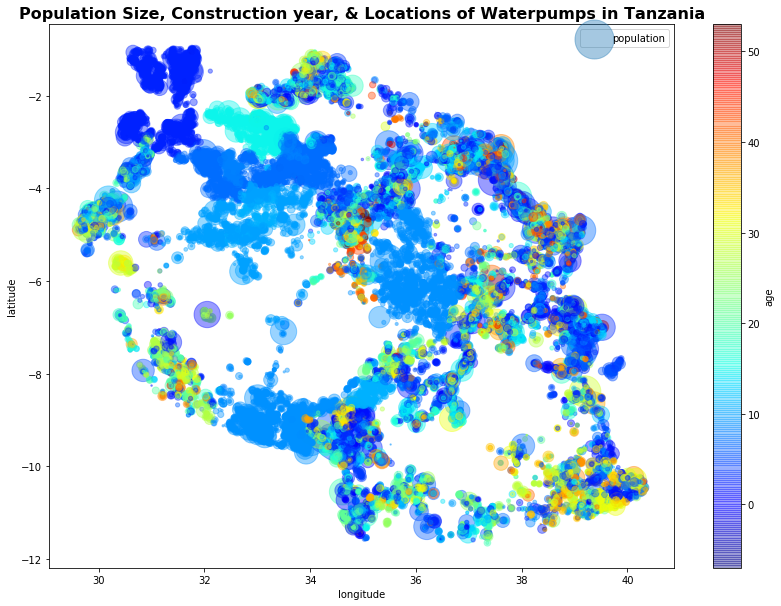

In [129]:
df_total[df_total['longitude']>0] [df_total['latitude']<0][X_train['construction_year']>0].plot\
(kind='scatter', x="longitude", y="latitude", alpha=0.4,
s=df_total["population"]/10, label="population", figsize=(14,10),

c="age", cmap=plt.get_cmap("jet"), colorbar=True,
sharex=False);
plt.title("Population Size, Construction year, & Locations of Waterpumps in Tanzania", 
         fontsize =16, fontweight='bold')
plt.legend;